In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

In [3]:

def kmeans(X, k=3, max_iters=100, tol=1e-5, random_state=None):
    """
    X : numpy array of shape (n_samples, n_features)
    k : number of clusters
    max_iters : maximum number of iterations
    random_state : to make it random or to creat same results
    """
    if random_state:
        np.random.seed(random_state)

    n_samples, n_features = X.shape

    
    random_indices = np.random.choice(n_samples, size=k, replace=False)
    centroids = X[random_indices]

    for it in range(max_iters):
        # Assigning clusters
        clusters = [[] for _ in range(k)]
        for idx, point in enumerate(X):
            # distance from each centroid
            distances = [euclidean_distance(point, c) for c in centroids]
            cluster_id = np.argmin(distances)
            clusters[cluster_id].append(idx)

        # Copy old centroids
        old_centroids = centroids.copy()

        # Calculate centroids again
        for cluster_id, indices in enumerate(clusters):
            if indices:  # To avoid empty cluster
                centroids[cluster_id] = np.mean(X[indices], axis=0)

        
        if euclidean_distance(old_centroids, centroids)<tol:
            break

    # final cluster labels
    labels = np.zeros(n_samples)
    for cluster_id, indices in enumerate(clusters):
        for idx in indices:
            labels[idx] = cluster_id

    return centroids, labels


Centroids:
 [[8.96123512 2.05754975]
 [0.95365854 1.95472428]
 [5.48122262 8.01691143]]
Labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


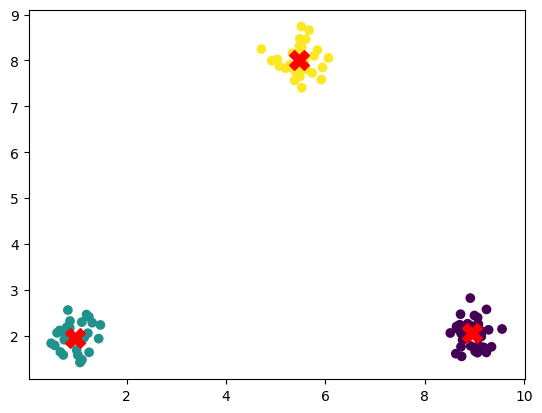

In [13]:
# df = np.array([
#     [1, 2], [1.5, 1.8], [5, 8],
#     [8, 8], [1, 0.6], [9, 11]
# ])

df = np.array(pd.read_csv('KMeansDataset.csv'))

centroids, labels = kmeans(df, k=3)

print("Centroids:\n", centroids)
print("Labels:", labels)

# Plotting
plt.scatter(df[:,0], df[:,1],c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='red', marker='X')
plt.show()